In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('Solar_Prediction.csv')
df.head()


,Unnamed: 0,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


In [15]:
df = df.dropna()
df.isnull().sum()


Unnamed: 0                0
UNIXTime                  0
Date                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [16]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day

df['Hours'] = df['datetime'].dt.hour
df['Minutes'] = df['datetime'].dt.minute
df['Seconds'] = df['datetime'].dt.second

df['sunrise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['sunset'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')

df['sunrise_hour'] = df['sunrise'].dt.hour 
df['sunrise_min']=df['sunrise'].dt.minute

df['sunset_hour'] = df['sunset'].dt.hour 
df['sunset_min']=df['sunset'].dt.minute

df.drop(['Unnamed: 0','Date','Time','datetime','sunrise','sunset','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

df.head()



C:\Users\Shree\AppData\Local\Temp\ipykernel_13484\3374494278.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hours,Minutes,Seconds,sunrise_hour,sunrise_min,sunset_hour,sunset_min
0,1475229326,1.21,48.0,30.46,59.0,177.39,5.62,2016,9,29,23,55,26,6,13,18,13
1,1475229023,1.21,48.0,30.46,58.0,176.78,3.37,2016,9,29,23,50,23,6,13,18,13
2,1475228726,1.23,48.0,30.46,57.0,158.75,3.37,2016,9,29,23,45,26,6,13,18,13
3,1475228421,1.21,48.0,30.46,60.0,137.71,3.37,2016,9,29,23,40,21,6,13,18,13
4,1475228124,1.17,48.0,30.46,62.0,104.95,5.62,2016,9,29,23,35,24,6,13,18,13


In [17]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        UNIXTime  Radiation  Temperature  Pressure  Humidity  \
UNIXTime                1.000000  -0.077384    -0.365183 -0.331553 -0.069590   
Radiation              -0.077384   1.000000     0.734147  0.119231 -0.222454   
Temperature            -0.365183   0.734147     1.000000  0.310873 -0.279059   
Pressure               -0.331553   0.119231     0.310873  1.000000 -0.223025   
Humidity               -0.069590  -0.222454    -0.279059 -0.223025  1.000000   
WindDirection(Degrees)  0.154640  -0.233851    -0.262443 -0.231738 -0.001625   
Speed                   0.173011   0.076396    -0.027114 -0.083840 -0.216691   
Year                         NaN        NaN          NaN       NaN       NaN   
Month                   0.968945  -0.089935    -0.347448 -0.341987 -0.078924   
Day                     0.303721   0.033249    -0.142440 -0.028205  0.026087   
Hours                   0.000403   0.004426     0.198433  0.090984  0.079165   
Minutes                 0.000294  -0.000

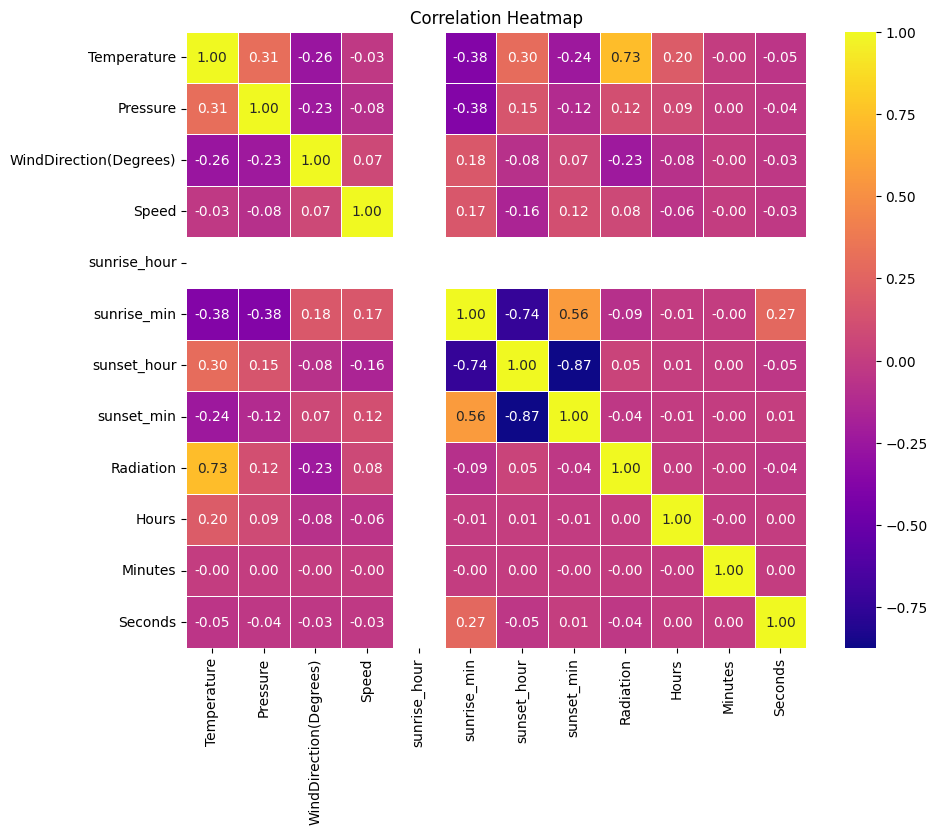

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Temperature', 'Pressure', 'WindDirection(Degrees)', 'Speed', 'sunrise_hour', 'sunrise_min', 'sunset_hour', 'sunset_min', 'Radiation', 'Hours', 'Minutes', 'Seconds']].corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Correlation Coefficient: 0.7341472460208044
Mean Squared Error: 41009.75875736737
Mean Absolute Error: 151.87524507919733
R-squared: 0.6018399899595808


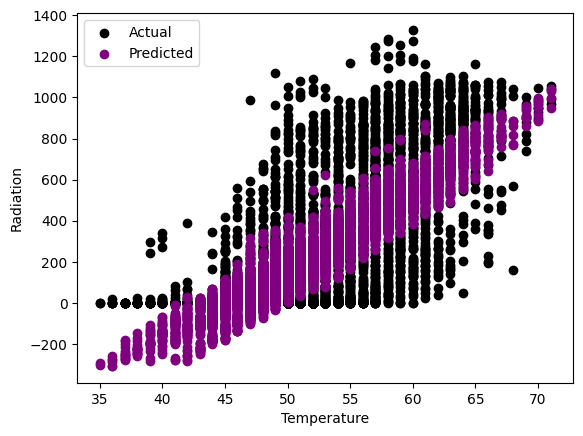

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[[ 'Temperature', 'Pressure', 'WindDirection(Degrees)', 'Speed', 'sunrise_hour', 'sunrise_min', 'sunset_hour','sunset_min']]
y = df['Radiation'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
correlation_coefficient = df['Temperature'].corr(df['Radiation'])

print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.scatter(X_test['Temperature'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temperature'], y_pred, color='purple', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.legend()
plt.show()

Correlation Coefficient: 0.7341472460208044
Mean Squared Error: 6970.773270553892
Mean Absolute Error: 32.98926506176749
R-squared: 0.9305047233118819


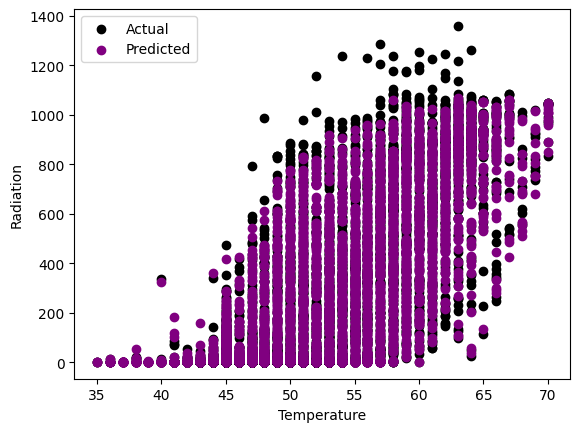

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['Temperature', 'Pressure', 'WindDirection(Degrees)', 'Speed', 'sunrise_hour', 'sunrise_min', 'sunset_hour','sunset_min', 'Hours', 'Minutes','Seconds']]
y = df['Radiation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestRegressor(n_estimators=100, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
correlation_coefficient = df['Temperature'].corr(df['Radiation'])

print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.scatter(X_test['Temperature'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temperature'], y_pred, color='purple', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.legend()
plt.show()


Correlation Coefficient: 0.7341472460208044
Mean Squared Error: 25762.922054825514
Mean Absolute Error: 101.89493970626465
R-squared: 0.7340919414551997


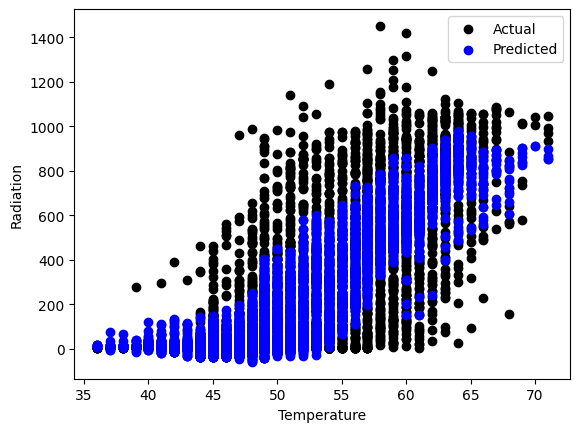

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
X = df[['Temperature', 'Pressure', 'WindDirection(Degrees)', 'Speed', 'sunrise_hour', 'sunrise_min', 'sunset_hour','sunset_min']]
y = df['Radiation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=30)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
correlation_coefficient = df['Temperature'].corr(df['Radiation'])

print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize the results
plt.scatter(X_test['Temperature'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temperature'], y_pred, color='blue', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.legend()
plt.show()
